###### Katherine Kairis, kak275@pitt.edu, 9/12/17

In [1]:
import pandas as pd
import numpy as np

# Series

In [2]:
data = pd.Series([1.0, 1.5, 2.0, 2.5, 3.0], 
                 index = ['a', 'b', 'c', 'd', 'e'])
data

a    1.0
b    1.5
c    2.0
d    2.5
e    3.0
dtype: float64

In [3]:
#Accessing elements from series
data['c']

2.0

In [4]:
#Checking if element is in series
print("'a' in data?", 'a' in data)
print("'f' in data?", 'f' in data)

'a' in data? True
'f' in data? False


In [5]:
data['e'] = 100.0

In [6]:
data

a      1.0
b      1.5
c      2.0
d      2.5
e    100.0
dtype: float64

In [7]:
list(data.items())

[('a', 1.0), ('b', 1.5), ('c', 2.0), ('d', 2.5), ('e', 100.0)]

In [8]:
data.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## Slicing

When slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice. But when slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice.

In [9]:
data['a' : 'c']

a    1.0
b    1.5
c    2.0
dtype: float64

In [10]:
data[0:2]

a    1.0
b    1.5
dtype: float64

In [11]:
#Only get elements greater than 1 and less than 3
data[(data > 1) & (data < 3)]

b    1.5
c    2.0
d    2.5
dtype: float64

In [12]:
#Get the elements at index b and index d
data[['b', 'd']]

b    1.5
d    2.5
dtype: float64

## Slicing using loc and iloc
The loc attribute allows indexing and slicing that always references the explicit index.
The iloc attribute allows indexing and slicing that always references the implicit Python-style index.

In [13]:
data = pd.Series(['a', 'b', 'c'], [3, 2, 1])
data

3    a
2    b
1    c
dtype: object

In [14]:
data.loc[1]

'c'

In [15]:
data.iloc[1]

'b'

In [16]:
data.loc[3:1]

3    a
2    b
1    c
dtype: object

In [17]:
data.iloc[0:3]

3    a
2    b
1    c
dtype: object

# Ufuncs Data Preservation

In [18]:
rng = np.random.RandomState()
ser = pd.Series(rng.randint(0, 10, 4))
print(ser)

0    6
1    7
2    9
3    1
dtype: int64


In [19]:
#multiply each element in ser by 3
np.multiply(3, ser)

0    18
1    21
2    27
3     3
dtype: int64

In [20]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,9,3,4,7
1,5,8,2,3
2,1,4,9,2


In [21]:
#Square each element in the data frame df
np.power(df, 2)

,A,B,C,D
0,81,9,16,49
1,25,64,4,9
2,1,16,81,4


## UFuncs: Index Alignment
For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with incomplete data.

### Index alignment in Series
The array resulting from alignment contains the union of indices of the two input arrays. Any item for which one or the other does not have an entry is marked with NaN, or "Not a Number," which is how Pandas marks missing data. Any missing values are filled with NaN by default.

In [22]:
series1 = pd.Series([5, 10, 15], index=[0, 1, 2])
series2 = pd.Series([1, 2, 3], index=[1, 2, 3])

series1/series2

0     NaN
1    10.0
2     7.5
3     NaN
dtype: float64

#### Setting the fill value
If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.

In [23]:
#If a value at a given index is missing from either of the series, -1 will be added 
#to the value found in one of the arrays.
series1.add(series2, fill_value = -1)

0     4.0
1    11.0
2    17.0
3     2.0
dtype: float64

## Index alignment in DataFrame
A similar type of alignment takes place for both columns and indices when performing operations on DataFrames

In [24]:
frame1 = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
frame1

,A,B
0,7,16
1,5,10


In [25]:
frame2 = pd.DataFrame(rng.randint(0, 20, (3,3)),
                     columns = ['A', 'B', 'C'])
frame2

,A,B,C
0,4,6,18
1,18,7,19
2,19,12,0


In [26]:
print(frame1 + frame2)
print(frame1.add(frame2, fill_value = 0))

      A     B   C
0  11.0  22.0 NaN
1  23.0  17.0 NaN
2   NaN   NaN NaN
      A     B     C
0  11.0  22.0  18.0
1  23.0  17.0  19.0
2  19.0  12.0   0.0


# Trade-Offs in Missing Data Conventions¶
There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame. Generally, they revolve around one of two strategies: using a mask that globally indicates missing values, or choosing a sentinel value that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with NaN (Not a Number), a special value which is part of the IEEE floating-point specification.

None of these approaches is without trade-offs: use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

## Missing data points

 Reserving a specific bit pattern in all available NumPy types would lead to an unwieldy amount of overhead in special-casing various operations for various types. Further, for the smaller data types (such as 8-bit integers), sacrificing a bit to use as a mask will significantly reduce the range of values it can represent.
 
Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point NaN value, and the Python None object.

## None: Pythonic missing data
The first sentinel value used by Pandas is None, a Python singleton object that is often used for missing data in Python code. Because it is a Python object, None cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object'

In [27]:
#This dtype=object means that the best common type representation NumPy could infer for the contents of the 
#array is that they are Python objects. While this kind of object array is useful for some purposes, 
#any operations on the data will be done at the Python level, with a lot of overhead.
vals = np.array([1, None, 3, 4])
vals

array([1, None, 3, 4], dtype=object)

## NaN (Not a Number): Missing numerical data
Nan is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.
If an operation involves a numerical value and Nan, the result will be NaN.

In [28]:
vals = np.array([1, np.nan, 3, 4]) 
vals.dtype

dtype('float64')

In [29]:
print("vals[0] + vals[2] =", vals[0] + vals[2])
print("vals[0] + vals[1] =", vals[0] + vals[1])
print("vals.sum() =", vals.sum())

vals[0] + vals[2] = 4.0
vals[0] + vals[1] = nan
vals.sum() = nan


In [30]:
#NumPy does provide some special aggregations that will ignore these missing values:
print("np.nansum(vals) =", np.nansum(vals))
print("np.nanmin(vals) =", np.nanmin(vals))
print("np.nanmax(vals) =", np.nanmax(vals))

np.nansum(vals) = 8.0
np.nanmin(vals) = 1.0
np.nanmax(vals) = 4.0


## NaN and None in Pandas
NaN and None both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate.

In [31]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present. For example, if we set a value in an integer array to np.nan, it will automatically be upcast to a floating-point type to accommodate the NA:

In [32]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [33]:
#In addition to casting the integer array to floating point, 
#Pandas automatically converts the None to a NaN value.

x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. There are several useful methods for detecting, removing, and replacing null values in Pandas data structures:
* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed

### Detecting Null values

In [34]:
data = pd.Series([1, np.nan, 'hello', None])
print("isnull():")
print(data.isnull())
print("\nnotnull():")
print(data.notnull())

isnull():
0    False
1     True
2    False
3     True
dtype: bool

notnull():
0     True
1    False
2     True
3    False
dtype: bool


### Dropping Null Values

In [35]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [36]:
data.dropna()

0        1
2    hello
dtype: object

#### Dropping null values in data frames
We cannot drop single values from a DataFrame; we can only drop full rows or full columns. dropna() gives a number of options for a DataFrame.

In [37]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [38]:
#By default, dropna() drops all rows that contain at least one null value
df.dropna()

,0,1,2
1,2.0,3.0,5


In [39]:
#Specify axis in dropna() to remove all columns containing at least one null
df.dropna(axis='columns') #Equivalent to df.dropna(axis=1)

,2
0,2
1,5
2,6


#### how and thresh parameters
These parameters give you more options when dropping Nan values. You can drop rows or columns with all NA values, or a majority of NA values. This can be specified through the how or thresh parameters, which allow fine control of the number of nulls to allow through.

The default is how='any', such that any row or column (depending on the axis keyword) containing a null value will be dropped. 

In [40]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [41]:
#Gets rid of a column only if all of its values are null
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [42]:
#The thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept
#Here the first and last row have been dropped, because they contain only two non-null values.
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling Null values
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

In [43]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [44]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [45]:
#We can specify a forward-fill to propagate the previous value forward
#If there is a null value, it will be replaced by the value before it in the list
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [46]:
#Or we can specify a back-fill to propagate the next values backward
#If there is a null value, it will be replaced by the value after it in the list
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [47]:
#if a previous value is not available during a forward fill, the NA value remains.
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Hierarchical Indexing
Pandas allows you to make use of hierarchical indexing (through MultiIndex objects) to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be represented within the one-dimensional Series and two-dimensional DataFrame objects.

## Pandas MultiIndex

In [48]:
#The bad way
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)

#A better way (using Pandas MultiIndex)
#In this multi-index representation, any blank entry indicates the same value as the line above it.
index = pd.MultiIndex.from_tuples(index)
print("index:")
print(index)

print("\npop:")
pop = pop.reindex(index)
print(pop)

index:
MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

pop:
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [49]:
#Access data from 2010
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

## MultiIndex as extra dimension
The unstack() method will quickly convert a multiple indexed Series into an indexed DataFrame.
The stack() method provides the opposite operation.

In [50]:
pop_ser = pop.unstack()
pop_ser

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [51]:
pop_ser.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [52]:
"""
Each extra level in a multi-index represents an extra dimension of data; taking advantage of this property gives 
us much more flexibility in the types of data we can represent. We might want to add another column 
of demographic data for each state at each year (say, population under 18) ; with a MultiIndex this is as easy 
as adding another column to the DataFrame
"""
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [53]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

### Through lists

In [54]:
frame = pd.DataFrame(np.random.rand(4,2),
                    index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns = ['data1', 'data2'])
frame

data1     data2
a 1  0.183185  0.443442
  2  0.753256  0.597698
b 1  0.478587  0.546468
  2  0.467119  0.728451

### Through dictionaries

In [55]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Explicit MultiIndex constructors
For more flexibility in how the index is constructed, you can construct the MultiIndex from a simple list of arrays and give the index values within each level.

In [56]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [57]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [58]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

### MultiIndex level names

In [59]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Indexing and Slicing a MultiIndex

In [60]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [61]:
print("Population of California in 2000:", pop['California', 2000])

print("\nPopulations of Callifornia:")
print(pop['California'])

print("\nGet the populations of California, New York, and all other states that fall between them in the list:")
print(pop.loc['California':'New York'])

print("\nGet the popluations of all states in 2000:")
print(pop[: ,2000])

print("\nGet all of the populations greater than 22000000:")
print(pop[pop > 22000000])

print("\nPrint the populations of California and Texas:")
print(pop[['California', 'Texas']])

Population of California in 2000: 33871648

Populations of Callifornia:
year
2000    33871648
2010    37253956
dtype: int64

Get the populations of California, New York, and all other states that fall between them in the list:
state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

Get the popluations of all states in 2000:
state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

Get all of the populations greater than 22000000:
state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Print the populations of California and Texas:
state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64


## Rearranging Multi-Indices

### Sorted and unsorted indices
Many of the MultiIndex slicing operations will fail if the index is not sorted.

In [62]:
#Indexed data where the indices are not lexographically sorted
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.634200
      2      0.852278
c     1      0.570823
      2      0.409071
b     1      0.312641
      2      0.173871
dtype: float64

In [63]:
#Trying to take a partial slice of this index, it will result in an error:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [64]:
#Sorted the indices
data = data.sort_index()
data

char  int
a     1      0.634200
      2      0.852278
b     1      0.312641
      2      0.173871
c     1      0.570823
      2      0.409071
dtype: float64

In [65]:
#Can slice the data with sorted indices
data['a':'b']

char  int
a     1      0.634200
      2      0.852278
b     1      0.312641
      2      0.173871
dtype: float64

# Combining Datasets: Concat and Append

## Simple Concatenation with pd.concat
pd.concat() can be used for a simple concatenation of Series or DataFrame objects, just as np.concatenate() can be used for simple concatenations of arrays.

### Single indices

In [66]:
series1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
series2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])

print("series1:")
print(series1)

print("\nseries2:")
print(series2)

pd.concat([series1, series2])

series1:
1    A
2    B
3    C
dtype: object

series2:
4    D
5    E
6    F
dtype: object


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

### Duplicate indices
One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices, even if the result will have duplicate indices

In [67]:
x = pd.Series("AB", [0, 1])
y = pd.Series("AB", [2, 3])

print("x:")
print(x)

print("\ny:")
print(y)

y.index = x.index
print("\ny (after changing indices):")
print(y)

print("\nx + y:")
print(pd.concat([x,y]))

x:
0    AB
1    AB
dtype: object

y:
2    AB
3    AB
dtype: object

y (after changing indices):
0    AB
1    AB
dtype: object

x + y:
0    AB
1    AB
0    AB
1    AB
dtype: object


#### Catching the repeats as an error

In [68]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [0, 1]


#### Ignoring the index

In [69]:
pd.concat([x, y], ignore_index=True)

0    AB
1    AB
2    AB
3    AB
dtype: object

### The append() method

In [70]:
x.append(y)

0    AB
1    AB
0    AB
1    AB
dtype: object

# Combining Datasets: Merge and Join

## One-to-one joins

In [71]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

print("df1:")
print(df1)

print("\ndf2:")
print(df2)

df3 = pd.merge(df1, df2)
print("\nmerging df1 and df2:")
print(df3)

df1:
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2:
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

merging df1 and df2:
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


## Many-to-one joins
Many-to-one joins are joins in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate.

In [72]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

print("df3")
print(df3)

print("\ndf4")
print(df4)

print("\nmergine df3 and df4")
print(pd.merge(df3, df4))

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

mergine df3 and df4
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


## Many-to-many joins
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.

In [73]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print("df1")
print(df1)

print("\ndf5")
print(df5)

print("\nmergine df1 and df5")
print(pd.merge(df1, df5))

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df5
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization

mergine df1 and df5
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Specifications of the merge key

### The 'on' keyword
You can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names.

In [74]:
print("df1:")
print(df1)

print("\ndf2:")
print(df2)

pd.merge(df1, df2, on='employee')

df1:
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2:
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### The left_on and right_on keywords
At times you may want to merge two datasets with different column names. In this case, you can use the left_on and right_on keywords.

In [75]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

print("df1:")
print(df1)

print("\ndf3:")
print(df3)

df6 = pd.merge(df1, df3, left_on="employee", right_on="name")
print("\nmerging df1 and df3:")
print(df6)

df1:
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3:
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

merging df1 and df3:
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [76]:
#To get rid of redundant columns, use drop()
df6.drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The left_index and right_index keywords
These keywords allow you to merge on an index

In [77]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

print("df1a:")
print(df1a)

print("\ndf2a:")
print(df2a)

print("\nmerging df1a and df2a on employee index:")
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

df1a:
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df2a:
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014

merging df1a and df2a on employee index:
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


# Aggregation
* count(): Total number of items
* first(), last(): First and last item
* mean(), median(): Mean and median
* min(), max(): Minimum and maximum
* std(), var(): Standard deviation and variance
* mad(): Mean absolute deviation
* prod(): Product of all items
* sum(): Sum of all items

In [78]:
#Aggregation with a series
ser = pd.Series(rng.rand(5))
print(ser)

print("ser.sum()=", ser.sum())
print("ser.mean()=", ser.mean())

0    0.635461
1    0.614895
2    0.213391
3    0.987482
4    0.640652
dtype: float64
ser.sum()= 3.091880880775478
ser.mean()= 0.6183761761550957


In [79]:
#Aggregation with a data frame (by default, aggregates columns)
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
print(df)

print("\ndf.mean():")
print(df.mean())

          A         B
0  0.048621  0.902538
1  0.403602  0.824284
2  0.526275  0.714918
3  0.838553  0.246821
4  0.975387  0.011731

df.mean():
A    0.558488
B    0.540058
dtype: float64


In [80]:
#Use axis argument to aggregate rows in data frame
df.mean(axis='columns')

0    0.475580
1    0.613943
2    0.620597
3    0.542687
4    0.493559
dtype: float64

## GroupBy: Split, Apply, Combine
* GroupBy combines the following steps into one command:
    * The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
    * The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
    * The combine step merges the results of these operations into an output array.

In [81]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [82]:
print("sum of key categories")
print(df.groupby('key').sum())

print("\nmean of key categories")
print(df.groupby('key').mean())

sum of key categories
     data
key      
A       3
B       5
C       7

mean of key categories
     data
key      
A     1.5
B     2.5
C     3.5


### Aggregate, filter, transform, apply

In [83]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,9
1,B,1,7
2,C,2,4
3,A,3,1
4,B,4,9
5,C,5,5


In [84]:
#The aggregate() method can take a string, a function, or a list thereof, and compute all the aggregates at once
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     1    5.0   9
B       1    2.5   4     7    8.0   9
C       2    3.5   5     4    4.5   5

In [85]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,9
B,1,9
C,2,5


# Pandas String Operations
Methods similar to Python string methods.
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:

* len()		         	
* ljust()	      		
* rjust()	     		
* center()	    		
* zfill()	    		
* strip()	     		
* rstrip()	     		
* lstrip()		        
* lower()
* upper()
* find()
* rfind()
* index()
* rindex()
* capitalize()
* swapcase()
* translate()
* startswith()
* endswith()
* isalnum()
* isalpha()
* isdigit()
* isspace()
* istitle()
* islower()
* isupper()
* isnumeric()
* isdecimal()
* split()
* rsplit()
* partition()
* rpartition()

In [86]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
names = pd.Series(data)

In [87]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [88]:
names.str.len()

0    5
1    4
2    4
3    5
dtype: int64

## Methods using regular expressions
* match(): Call re.match() on each element, returning a boolean.
* extract(): Call re.match() on each element, returning matched groups as strings.
* findall(): Call re.findall() on each element
* replace(): Replace occurrences of pattern with some other string
* contains(): Call re.search() on each element, returning a boolean
* count(): Count occurrences of pattern
* split(): Equivalent to str.split(), but accepts regexps
* rsplit(): Equivalent to str.rsplit(), but accepts regexps
* get()	Index each element
* slice(): Slice each element
* slice_replace(): Replace slice in each element with passed value
* cat(): Concatenate strings
* repeat(): Repeat values
* normalize(): Return Unicode form of string
* pad(): Add whitespace to left, right, or both sides of strings
* wrap(): Split long strings into lines with length less than a given width
* join(): Join strings in each element of the Series with passed separator
* get_dummies(): extract dummy variables as a dataframe

In [89]:
#Get the first letter of each name
names.str.extract('([A-Za-z])', expand=False)

0    p
1    P
2    M
3    g
dtype: object

In [90]:
#Get all of the names that end in a vowel
names.str.findall(r'[A, E, I, O, U, Y, a, e, i, o, u, y]$')

0     []
1     []
2    [Y]
3    [O]
dtype: object

In [91]:
standings = pd.read_csv("mlb_standings_2016_katherine.csv", index_col = 0)

In [92]:
standings

,League,Division,Wins,Losses
Team,,,,
Chicago Cubs,National,Central,103,58
Texas Rangers,American,West,95,67
Washington Nationals,National,East,95,67
Cleveland Indians,American,Central,94,67
Boston Red Sox,American,East,93,69
Los Angeles Dodgers,National,West,91,71
Baltimore Orioles,American,East,89,73
Toronto Blue Jays,American,East,89,73
New York Mets,National,East,87,75


In [93]:
#Get data for the Houston Astros
standings.loc[['Houston Astros']]

,League,Division,Wins,Losses
Team,,,,
Houston Astros,American,West,84,78


In [94]:
#Get the highest number of wins in the MLB
standings['Wins'].max()

103

In [95]:
#Get all of the teams in the American League
AL = standings.loc[standings['League'] == 'American']
AL

,League,Division,Wins,Losses
Team,,,,
Texas Rangers,American,West,95,67
Cleveland Indians,American,Central,94,67
Boston Red Sox,American,East,93,69
Baltimore Orioles,American,East,89,73
Toronto Blue Jays,American,East,89,73
Detroit Tigers,American,Central,86,75
Seattle Mariners,American,West,86,76
New York Yankees,American,East,84,78
Houston Astros,American,West,84,78


In [96]:
#Get the highest number of wins in the American League
AL['Wins'].max()

95

In [97]:
#Get the highest number of losses in the American League
AL['Losses'].max()

103

In [98]:
#Get the average number of wins in the National League
NL = standings.loc[standings['League'] == 'National']
NL['Wins'].mean()

79.86666666666666

In [99]:
#Get the fewest number of wins in the National League
NL['Wins'].min()

68

In [100]:
#Get all of the teams in the National League Central division
NL.loc[standings['Division'] == 'Central']

,League,Division,Wins,Losses
Team,,,,
Chicago Cubs,National,Central,103,58
St. Louis Cardinals,National,Central,86,76
Pittsburgh Pirates,National,Central,78,83
Milwaukee Brewers,National,Central,73,89
Cincinnati Reds,National,Central,68,94


# To-do 4

In [101]:
restaurants = pd.read_csv("placestoeat_haring.csv", index_col = 0)
restaurants

,Neighborhood,Price
Place,,
Girasole,Shadyside,$$
Smallman Galley,The Strip,$$
Pastolis,Squirrel Hill,$
Gaucho,The Strip,$$
Spice Island Tea House,South Oakland,$
Fatheads,South Side,$
Pamela's,Oakland,$
Noodlehead,East Liberty,$
SMOKE,Lawrenceville,$$


In [102]:
#Get information for Pastolis
restaurants.loc['Pastolis']

Neighborhood    Squirrel Hill
Price                       $
Name: Pastolis, dtype: object

In [103]:
#Get info for the last restaurant in the table
restaurants.iloc[-1]

Neighborhood    Downtown
Price                 $$
Name: Emporio, dtype: object

In [104]:
#Get all of the restaurants in the Strip District
strip_restaurants = restaurants.loc[restaurants["Neighborhood"] == "The Strip"]
strip_restaurants

,Neighborhood,Price
Place,,
Smallman Galley,The Strip,$$
Gaucho,The Strip,$$
Chicken Latino,The Strip,$


In [105]:
#Get all of the inexpensive restaurants (The restaurants with one '$)
cheap_restaurants = restaurants.loc[restaurants["Price"] == '$']
cheap_restaurants

,Neighborhood,Price
Place,,
Pastolis,Squirrel Hill,$
Spice Island Tea House,South Oakland,$
Fatheads,South Side,$
Pamela's,Oakland,$
Noodlehead,East Liberty,$
All India,North Oakland,$
The Columbian Spot,South Side,$
Chicken Latino,The Strip,$


In [106]:
#Get all of the restaurants located in one of the Oakland neighborhoods
neighborhoods = pd.Series(restaurants["Neighborhood"])
pd.DataFrame(neighborhoods.str.findall(r'^(South Oakland|North Oakland|Oakland)'))

,Neighborhood
Place,
Girasole,[]
Smallman Galley,[]
Pastolis,[]
Gaucho,[]
Spice Island Tea House,[South Oakland]
Fatheads,[]
Pamela's,[Oakland]
Noodlehead,[]
SMOKE,[]


## To-do 5: Visualization

In [107]:
import matplotlib as mpl
import matplotlib.pyplot as plt

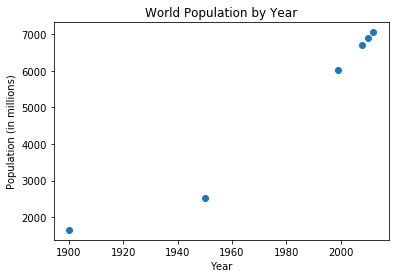

In [108]:
year = [1900, 1950, 1999, 2008, 2010, 2012]
population = [1650, 2521, 6008, 6707, 6896, 7052]
plt.scatter(year, population)
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.title("World Population by Year")
plt.show()

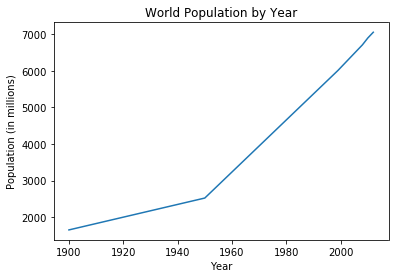

In [109]:
plt.plot(year, population)
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.title("World Population by Year")
plt.show()

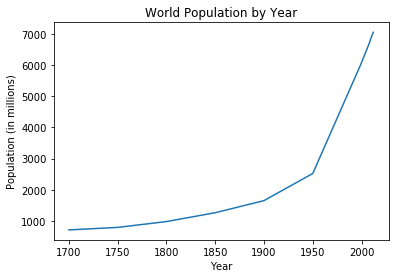

In [110]:
a = [1700, 1750, 1800, 1850] + year
b = [710, 791, 978, 1262] + population

plt.plot(a, b)
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.title("World Population by Year")
plt.show()